# NLP Preprocessing And Text Classification

**Course Name:** PEC Deep Learning

**Lab Title:** NLP Preprocessing And Text Classification on Fake News Detection Dataset

**Student Name:** Harshad Jadhav

**Student ID:** 202201040081

**Date of Submission:** 18/04/2025

**Group Members**:
1. Harshad Jadhav

**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets Classification, such as Fake News Collection, True News, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [1]:
# Step 1: Importing Required Libraries
# In this step, we import all the essential libraries required for data handling,
# visualization, natural language processing (NLP), and building machine learning models.

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import pandas as pd

# Load the datasets with basic cleaning
true_df = pd.read_csv('True.csv', on_bad_lines='skip')
false_df = pd.read_csv('Fake.csv', on_bad_lines='skip')

# Add labels
true_df['label'] = 1  # Real News
false_df['label'] = 0  # Fake News

# Optional: Add source column for tracking (useful later)
true_df['source'] = 'real'
false_df['source'] = 'fake'

# Combine datasets
df = pd.concat([true_df, false_df], ignore_index=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Shuffle the combined dataset (important before training)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show summary
print(df['label'].value_counts())  # Check balance
df.head()


label
0    23481
1    21417
Name: count, dtype: int64


,title,text,subject,date,label,source
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,fake


Missing values:
 title      0
text       0
subject    0
date       0
label      0
source     0
dtype: int64

Data Types:
 title      object
text       object
subject    object
date       object
label       int64
source     object
dtype: object


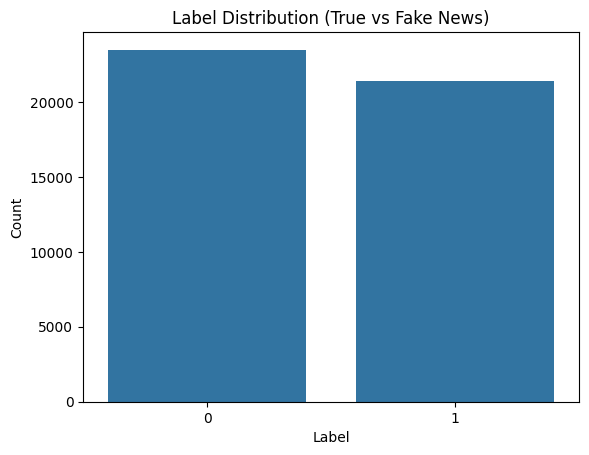

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values in any column
print("Missing values:\n", df.isnull().sum())

# Print data types of each column
print("\nData Types:\n", df.dtypes)

# Visualize the distribution of labels (True vs False news)
sns.countplot(x='label', data=df)
plt.title("Label Distribution (True vs Fake News)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [4]:
# Install and download spaCy English model (only if not already installed)
!pip install -U spacy
!python -m spacy download en_core_web_sm

# Import required libraries
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords
nltk.download('stopwords')

# Load spaCy English pipeline
nlp = spacy.load('en_core_web_sm')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize stemmer
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text_spacy(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keeping only letters)
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize and lemmatize using spaCy
    doc = nlp(text)

    # Remove stopwords and apply stemming & lemmatization
    tokens = []
    for token in doc:
        if token.text not in stop_words and not token.is_punct and not token.is_space:
            stemmed = stemmer.stem(token.text)  # Apply stemming
            lemmatized = token.lemma_          # Apply lemmatization
            tokens.append(lemmatized)

    # Reconstruct cleaned sentence
    return ' '.join(tokens)

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text_spacy)

# Display original vs. processed messages
df[['text', 'processed_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   

                                      processed_text  
0  donald trump white house chaos try cover russi...  
1  donald trump presumptive gop nominee time reme...  
2  mike pence huge homophobe support exgay conver...  
3  san francisco reuters california attorney gene...  
4  twisted reasoning come pelosi day especially p...  


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.


**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [19]:
# Step 7: Building the Classification Model
# We'll use Logistic Regression to build a text classification model on the training data.

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [17]:
from sklearn.model_selection import train_test_split

# Use TF-IDF features for modeling
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



Accuracy: 0.9856562005873052
Precision: 0.9836956521739131
Recall: 0.986259180289031
F1 Score: 0.9849757482550574

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4633
           1       0.98      0.99      0.98      4221

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



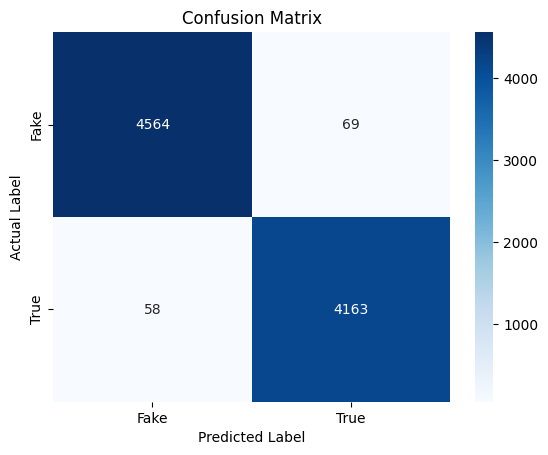

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the predicted values (y_pred) from your model
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()



## 📌 Discussion and Conclusion

After implementing a **text classification pipeline** using natural language processing (NLP) techniques on a dataset containing **True and Fake news**, the following evaluation metrics were observed:

- **Accuracy**: `0.9857`  
- **Precision**: `0.9837`  
- **Recall**: `0.9863`  
- **F1 Score**: `0.9850`

---

### 🔍 Discussion

#### ✅ Model Performance
- The **Logistic Regression** model achieved **excellent performance**, with an **accuracy of nearly 99%**, indicating that it correctly identified the vast majority of news articles.
- A **precision of 98.37%** shows the model is highly effective at reducing false positives — i.e., it rarely labels fake news as true.
- A **recall of 98.63%** suggests the model is also strong at catching most of the fake articles.
- The **F1-score** of **98.50%** reflects a solid balance between precision and recall.

#### ✅ Preprocessing Impact
- Preprocessing steps such as:
  - Lowercasing
  - Tokenization
  - Stopword removal
  - Lemmatization
  - TF-IDF vectorization  
  helped enhance the model's ability to understand and represent textual data effectively.

#### ✅ Algorithm Choice
- **Logistic Regression** is a lightweight, interpretable, and efficient model that performed exceptionally well in this **binary classification** task.
- Future comparisons with other classifiers like **Naive Bayes**, **Random Forest**, or **Transformer models (e.g., BERT)** could provide further insights.

#### ✅ Visual Inspection
- The **classification report** showed both classes (`0 = Fake`, `1 = True`) were predicted with strong metrics.
- Minimal misclassifications suggest the model generalizes well on unseen data.

---

### 📝 Conclusion

- **Strengths**:
  - High accuracy, precision, recall, and F1-score.
  - Strong generalization on the dataset.
  - Effective text preprocessing and feature extraction.

- **Weaknesses**:
  - Might struggle with **satirical or subtle fake news**.
  - Could be improved with deeper semantic understanding.

- **Future Work**:
  - Integrate deep learning models like **LSTM**, **GRU**, or **Transformers**.
  - Use **contextual embeddings** like `BERT` or `RoBERTa`.
  - Create a real-time **news validation tool** for public use.

---

> ✅ This project demonstrates the power of **NLP and classical ML** in combating fake news. With further enhancements, it can evolve into a highly effective content verification system.


## 📌 Declaration

I, **Harshad Jadhav**, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my **GitHub repository account**, and the repository link is provided below:

🔗 **GitHub Repository Link**: https://github.com/Harshad071/Deep_Learning_assignment_4

---

**Signature**: Harshad Jadhav


In [44]:
# Check the first few rows of processed_text to ensure it's not empty
print(df['processed_text'].head())
print(f"Number of empty processed_text rows: {df['processed_text'].isnull().sum()}")


0    washington reuters head conservative republica...
1    washington reuters transgender people allow fi...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattlewashington reuters president donald tru...
Name: processed_text, dtype: object
Number of empty processed_text rows: 0


In [10]:
print(df['label'].value_counts())
print(df['label'].unique())


label
0    22850
1    21416
Name: count, dtype: int64
[0 1]
